<a href="https://colab.research.google.com/github/prachi-khandelwal/Dog-Vision-MultiClassification-Project/blob/master/end_to_end_dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶End-To-End MultiClass Dog Breed Identification

this Notebook builds an end-to-end multi-class image classifier using TensolrFlow 2.0 and Tensorflow Hub.

## 1. Problem

Identifying the breed of the dog given in the image of a dog.

When I am roaming around in my locality a dog passed and I wanted to Know the breed of the dog.😊😁

## 2. Data

The Data we're using is from Kaggle's Dog Breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is the file with Prediction Probabilitiesfor each dog breed in the image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation
## 4. Features

Some Information about the Data:
* We're dealing with images (unstructured Data) so its probably best to use Deep learning /Transfer Learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10K images in Trainng set (These Images have Labels).
* There are around 10k images in Test set (These Images don't have labels).





In [4]:
# Unzip the data into Google Drive.
# !unzip "/content/drive/My Drive/Dog vision/dog-breed-identification.zip" -d "drive/My Drive/Dog vision"

# Get our Workspace Ready!
* Import Tensorflow 2.x ✅
* Import TensorFlow Hub✅
* Make sure we're using a GPU 


Import necessary Tools

In [5]:
# Import TensorFlow into COlAB
import tensorflow as tf
print("Tensorflow version:",tf.__version__)
# Import Tensorflow HUB
import tensorflow_hub as hub
print("Tensorflow hub version:",hub.__version__)

Tensorflow version: 2.2.0
Tensorflow hub version: 0.8.0


In [6]:
# Check If a GPU available
print("GPU", "available YEP!" if tf.config.list_physical_devices("GPU") else "not available :( ")

GPU available YEP!


## Getting our Data ready! (turning into tensors)
With all ML models our data must be in numerical format. So that's what we're going to do.
Turning our images into tensors(Numerical Representation)

Let's start by accessing our data and checking labels



In [7]:
# Checkout the data labels
import pandas as pd
import numpy as np
labels_csv = pd.read_csv("drive/My Drive/Dog vision/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     25d13706449a0e5bc89077b99366b448  scottish_deerhound
freq                                   1                 126


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [8]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [9]:
# Let's see the no. of images of each breed
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

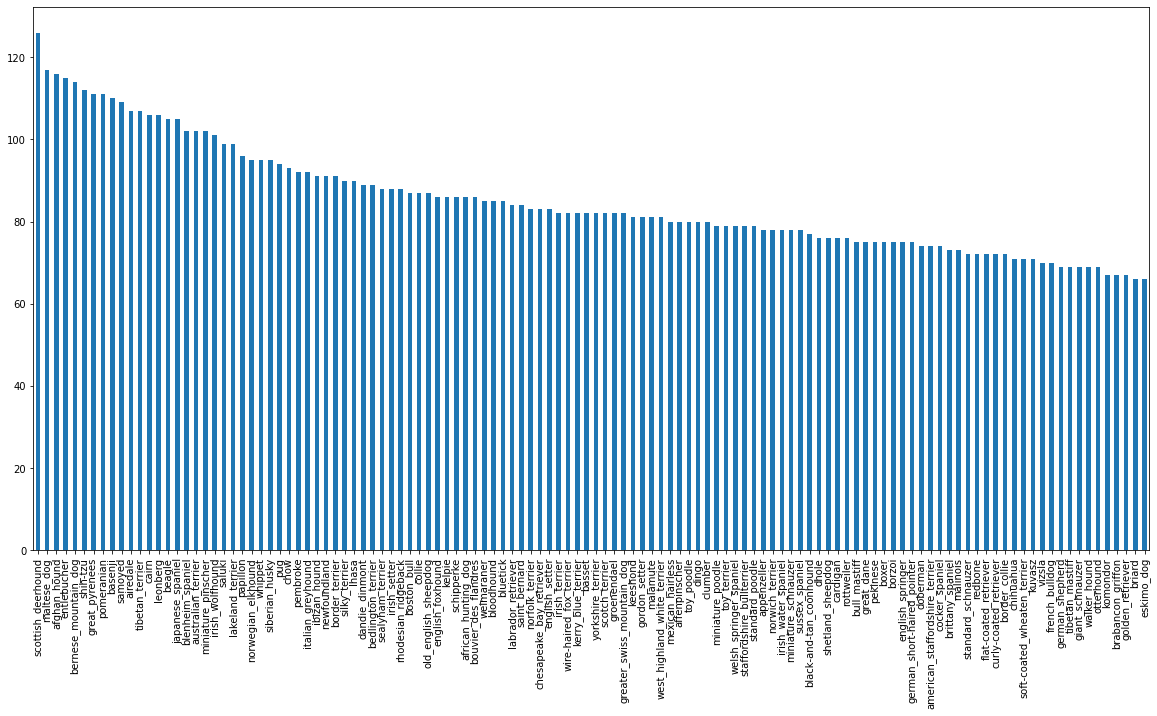

In [10]:
# let's visualize it
ax = labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [11]:
# To display the Images
from IPython.display import display, Image
# Image("drive/My Drive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting Images and their labels
Let's get list of our images file Pathnames

In [12]:

# Create filenames from ID
filenames = ["drive/My Drive/Dog vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/My Drive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [14]:
# Checking whether the number of filenames mathcing to the actual images files in train folder
import os
if len(os.listdir("drive/My Drive/Dog vision/train/")) == len(filenames):
  print("Number of files Matched Proceed!")
else:
  print("Files Not Matched Erorr!")
  
  

Number of files Matched Proceed!


### Since Now we've got our FilePath ready, let's prepare our labels

In [15]:
labels = labels_csv['breed'].to_numpy()  #to_numpy() converts into numpy array
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [16]:
len(labels)

10222

In [17]:
#let's see if number of labels matches number of filenames
if len(labels) == len(filenames):
  print("No. of Labels Matches No. of Filenames! Proceed.")
else:
  print("Check Again! Labels does't matches Filenames")


No. of Labels Matches No. of Filenames! Proceed.


In [18]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [19]:
# turn single label into an array
print(labels[1])
labels[1] == unique_breeds

dingo


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
# Turn every label into a Boolean Array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [21]:
len(boolean_labels)

10222

## Turning **Boolean Labels into Integers**

In [22]:
print(labels[1]) #Original Label
print(np.where(unique_breeds == labels[1])) #index where label occur in unique_breeds 
print(boolean_labels[1].argmax()) #argmax returns max value in the array
print(boolean_labels[1].astype(int)) #converts boolean values into Int

dingo
(array([37]),)
37
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]



## Creating our own Validation set
Since kaggle doesn't provide any validation set.

In [23]:
# Setup X and Y variables
X = filenames
y = boolean_labels

Since Experimenting with 10k images might take long, so we'll experiment with ~1000 images at first & increases as needed.

In [24]:
# Set number of images
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [25]:
# Let's split our data into train & valid sets
from sklearn.model_selection import train_test_split

# let's split our data into train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_IMAGES],
                                                      y[:NUM_IMAGES],
                                                      test_size=0.2,
                                                      random_state=42)
len(X_train), len(X_valid), len(y_train), len(y_valid)

(800, 200, 800, 200)

In [26]:
#Let's peek into our train and test data
X_train[:5], y_train[:2]

(['drive/My Drive/Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Pre-processing of Image (Turning into Tensors)
To process our images into Tensors we're going to write a function which does few things.
1. Take Image filepath as input.
2. Use Tensorflow to read the image file and save it to a variable, `image`.
3. Turn our `image` (jpg) into Tensors.
4. Normalise our image (convert our color channel values from 0-255 to 0-1). 
5. Resize the image to be a shape of (224,224).
6. Return the modified image.

Before creating function let's peek how a tensor image look like

In [27]:
# Convert single image into numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
len(image),image

(257, array([[[ 89, 137,  87],
         [ 76, 124,  74],
         [ 63, 111,  59],
         ...,
         [ 76, 134,  86],
         [ 76, 134,  86],
         [ 76, 134,  86]],
 
        [[ 72, 119,  73],
         [ 67, 114,  68],
         [ 63, 111,  63],
         ...,
         [ 75, 131,  84],
         [ 74, 132,  84],
         [ 74, 131,  86]],
 
        [[ 56, 104,  66],
         [ 58, 106,  66],
         [ 64, 112,  72],
         ...,
         [ 71, 127,  82],
         [ 73, 129,  84],
         [ 73, 130,  85]],
 
        ...,
 
        [[  2,  11,  10],
         [  5,  14,  13],
         [  6,  15,  14],
         ...,
         [120, 113,  67],
         [126, 118,  72],
         [122, 114,  67]],
 
        [[  0,   4,   6],
         [  0,   9,   8],
         [  1,  10,   9],
         ...,
         [105,  98,  52],
         [111, 104,  58],
         [111, 103,  56]],
 
        [[ 18,  16,  37],
         [ 18,  18,  28],
         [ 17,  20,  11],
         ...,
         [101,  92,  53

In [28]:
# Convert single image into tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [29]:
# Define image size
IMG_SIZE = 224

# Create a Function for preprocessing
def preprocess(image_path, img_size=IMG_SIZE):
  """
  Preprocess The Image and convert into tensors.
  """
  # Input the Image file path
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensors with 3 color channel(Red, Green and Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # normalise the color channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image
  image = tf.image.resize(image,[img_size, img_size])

  return image

## Turning our Data into Batches
Why turn our data into batches?
let's say if your are trying to process 10000 images at one go...

They all might not fit into memory.

So that's why we do 32(batch size) images at a time.

In order to use Tensorflow effectively, we need our data in the form of tensor tuples: `(image, label)`.



In [30]:

# Create a simple function to return a tuple
def get_image_label(image_path, label):
  """
  returns the image and label into tuple form
  """
  image = preprocess(image_path)
  return image, label

In [31]:
(preprocess(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now've got a way to turn our data into Tuples of Tensors in the form of `(image, label)`, Let's make a function to create Batches for our data `X` and `y`.

In [32]:
# define the batch size, 32 is good start
BATCH_SIZE = 32

# Create a Function to Turn Data into Batches
def create_data_batches(X, y, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates Batches of data out of image (X) and label (y) pairs.
  Shuffle the data if it's training data but doesn't shuffle valid data.
  Also accepts test data as input(no labels).
  """
  # If the Data is Test data, we probably don't have labels
  if test_data:
    print("Creating Test Data Batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #Only filepaths(no label)

    data_batch = data.map(process_image).batch(BATCH_SIZE)

    return data_batch

  # If the Data is Valid data, we don't need to shuffle it
  elif valid_data:
    print("Creating Valid data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #Filepath
                                               tf.constant(y))) #Label

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # If the Data is Training data, we had to shuffle it before processing Images
  # As it will save Computation Time
  else:
    print("Creating Training Data Batches...")
    # Turn Filepaths and Labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                               tf.constant(y)))
    # Shuffling the pathnames and labels before Mapping image process function
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples, it also turns the image path into processed image
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
  return data_batch
    

In [33]:
# Creating Validation and training data BATCHES
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_valid, y_valid, valid_data=True)

Creating Training Data Batches...
Creating Valid data batches


In [34]:
# Check out the attributes of our data Batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches
Our Data is in batches, this can be a liitle hard to comprehend let's visulaise our data specifically 25 Images. 

In [35]:
import matplotlib.pyplot as plt

# Create a function to visulaise batches of Images
def image_batch_visualise(image, label):
  """
  Displays a batch of 25 image batch with their labels.
  """
  # Set the figsize
  plt.figure(figsize=(10,10))
  #Set the loops to display 25 images
  for i in range(25):
     # set the axis subplots
     ax = plt.subplot(5, 5, i+1)
     # Display image
     plt.imshow(image[i])
     # Set the title over the image using label
     plt.title(unique_breeds[label[i].argmax()],{'color':'white','fontweight':'23'})
     # set the grid off
     plt.axis("off")



 ## UNBATCH THE BATCH DATA
```
# This is formatted as code
```

Now we've craeted our function to visulise the images but before that we first need to `UNBATCH` the proceesed images to visualise them.

In [36]:
train_images, train_labels = next(train_data.as_numpy_iterator())

In [37]:
len(train_images), len(train_labels)

(32, 32)

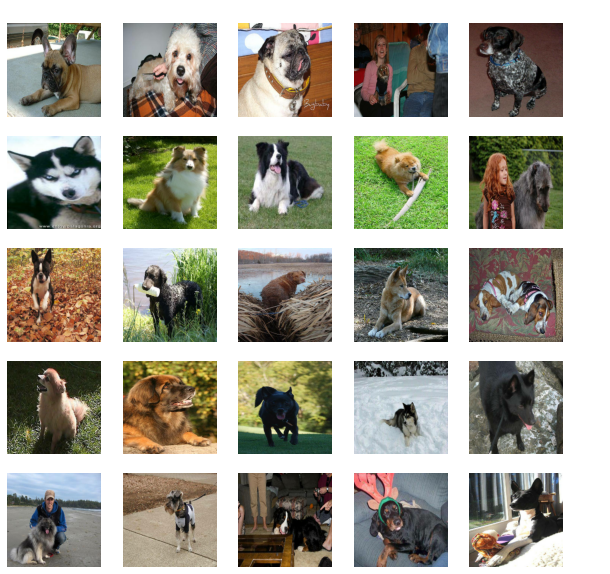

In [38]:
# Let's visualise Training batch
image_batch_visualise(train_images, train_labels)


In [39]:
# Let's visualise valid batch
valid_images, valid_labels = next(valid_data.as_numpy_iterator())



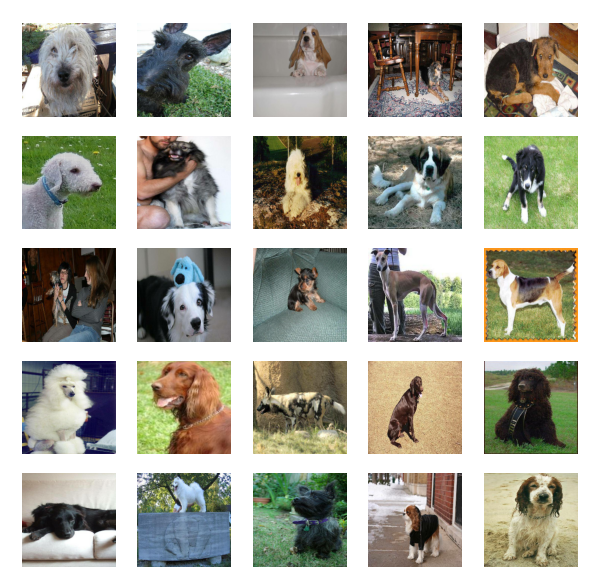

In [40]:
image_batch_visualise(valid_images, valid_labels)

# Building a Model
Before building a model we need to specify certain things to define.
1. The input shape (our image shape in the form of tensors) to our model.
2. the output shape (our image labels in the form of tensors) to our model.
3. URL of the Model which we're going to use from  Tensorflow Hub.
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [41]:
# Setup Input shape (Images)
INPUT_SHAPE = [None, IMG_SIZE,IMG_SIZE, 3] #batch, width, height, color channel

# Setup OutPut shape (labels)
OUTPUT_SHAPE = len(unique_breeds)

# URL of TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've input, output and our model ready to go, Let's put them together using Keras deep learning model!

Knowing this Let's create a model which does following tasks:
* Takes input, output and model we've chosen as parameters.
* Define the layers in Keras model as Sequential manner(do this, then this, then that).
* Complies the model(say evaluate and improved).
* Build the model tell it the input shape it'll be getting.
* Returns the model.





In [42]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model=MODEL_URL):
  print(" Building model with", MODEL_URL)

  #setup the model layers
  model = tf.keras.Sequential([
          hub.KerasLayer(MODEL_URL), #Layer 1 (input Layer)
          tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                activation='softmax') #Layer 2 output layer
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model




In [43]:
model = create_model()
model.summary()

 Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


###  Creating Callbacks
Callback are helper functions used in model training to do alot of things like save the Progress of the model, check it's progress and stop training model if it's stop improving.

We'll create two callbacks for TensorBoard one for saving it's progress and another for preventing model form traing too long.

### TensorBoard Callback

To set up TensorBoard callback, we need to do 3 things..
* Load the TensorBoard extension.
* Create a TensorBoard callback which is able to save logs to a directory and pass it to the `fit()` model's function.
* Visualize our model training logs with the `%tensorboard` magic function

In [44]:
# Load tensorBoard notebook extension
%load_ext tensorboard

In [45]:
import datetime

#Create function to build a tensorBoard callback
def create_tensorboard_callback():
  #Create log directory to store tensorboard logs
  logdir = os.path.join("drive /My drive/Dog vision/logs",
                        #Make it so logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
                        
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

Early stopping callback stops our model from overfitting by stopping training if a certain evaluation metrics stops Improving

In [46]:
# create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset data)
 Our first model is only going train 1,000 images, to make sure everything works fine..


In [47]:
NUM_EPOCHS = 100 #@param {type:'slider',min:10, max:100, step:10}


In [48]:
# Check to make sure we'are still running ona  GPU
print("GPU available Bravo!" if tf.config.list_physical_devices('GPU') else "Not available ಠ_ಠ  ")

GPU available Bravo!


### Let's create a function which trains our first ever deep learning model

* Create a model using `create_model()`.
* Setup Tensorflow callback using `create_tensorboard_callback()`.
* Calll the `fit()` function on our model passing it training data, validation data, number of epochs to tran for our model.
* Return the model.

In [49]:
# Build a function to create and train Model

def train_model():
  """
  Train's the give model and return the trained version.
  """

  # Create the model
  model = create_model()

  # Create the callbacks
  tensorboard = create_tensorboard_callback()

  # Fit the model
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  
  # Return the traineed Model
  return model


In [50]:
# Fit the model to the data
model = train_model()

 Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 332s 13s/step - loss: 4.6488 - accuracy: 0.0913 - val_loss: 3.6075 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 6s 254ms/step - loss: 1.6572 - accuracy: 0.6913 - val_loss: 2.2899 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 6s 254ms/step - loss: 0.5772 - accuracy: 0.9362 - val_loss: 1.7461 - val_accuracy: 0.5400
Epoch 4/100
25/25 [==============================] - 6s 254ms/step - loss: 0.2546 - accuracy: 0.9862 - val_loss: 1.5375 - val_accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 6s 257ms/step - loss: 0.1475 - accuracy: 0.9975 - val_loss: 1.4537 - val_accuracy: 0.6200
Epoch 6/100
25/25 [==============================] - 6s 255ms/step - loss: 0.1016 - accuracy: 1.0000 - val_loss: 1.3999 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================

**Question**
Our mlodel is performing far better in training process, it's been overfitted, so what are the ways to prevent overfitting in deep learning neural network.

**Note**
Overfitting is not a bad thing as means our model is learning !

# Checking the tesnsorBoard logs
The tensorboard magic function `(%tensorboard)` will access the logs directory we created earlier and visualize it's content

In [51]:
%tensorboard --logdir drive/My\ Drive/Dog\ vision/logs

<IPython.core.display.Javascript object>

## Making and Evaluating prediction using a trained model

In [52]:
# Make prediction on the validation data(not used in training)
predictions = model.predict(valid_data, verbose=1)
predictions

7/7 [==============================] - 1s 160ms/step


array([[1.19107391e-03, 1.48598483e-05, 1.14556157e-03, ...,
        1.01198282e-04, 3.14996687e-05, 1.73369003e-03],
       [1.13420421e-03, 2.22528994e-04, 1.80230271e-02, ...,
        1.87954400e-04, 1.14157586e-03, 1.08853950e-04],
       [1.96125729e-05, 1.16557931e-03, 1.22169891e-04, ...,
        7.41782642e-05, 5.12787410e-05, 1.33888493e-03],
       ...,
       [1.63143832e-05, 1.38093874e-05, 2.14274027e-04, ...,
        7.88935358e-06, 1.21053876e-04, 1.90337960e-05],
       [2.33490090e-03, 2.89839169e-04, 5.29311328e-05, ...,
        1.79088805e-04, 2.38858865e-05, 9.76097584e-03],
       [3.81422136e-03, 6.01414722e-05, 5.18378452e-04, ...,
        1.26930363e-02, 4.63864941e-04, 1.26469777e-05]], dtype=float32)

In [53]:
predictions.shape

(200, 120)

In [54]:
len(y_valid), len(unique_breeds)

(200, 120)

In [55]:
# First Prediction
predictions[1]

array([1.13420421e-03, 2.22528994e-04, 1.80230271e-02, 4.72829677e-04,
       3.12508055e-04, 2.05128272e-05, 2.21345015e-03, 2.53345497e-04,
       1.75410765e-03, 5.69724420e-04, 1.19462304e-04, 8.00729322e-06,
       2.78136558e-05, 1.35312566e-05, 8.69693758e-05, 1.02641345e-04,
       3.93495476e-03, 1.41364493e-04, 1.45526748e-04, 9.56177071e-04,
       3.08634626e-04, 9.46185719e-06, 3.34042816e-05, 1.33419189e-05,
       6.44058819e-05, 2.66251853e-04, 3.35357487e-02, 3.37035541e-04,
       6.63931423e-05, 5.94571640e-04, 4.30835644e-05, 8.87690112e-06,
       5.57257037e-04, 6.80646099e-06, 7.61413903e-05, 7.88005884e-04,
       1.84760400e-04, 1.19516894e-03, 3.11851793e-04, 4.12457157e-05,
       7.89078258e-05, 6.79401346e-05, 7.40732648e-05, 3.92466492e-04,
       6.08547241e-04, 4.92303458e-04, 1.69709063e-04, 1.64224584e-05,
       6.48670942e-02, 4.30432337e-05, 2.30645564e-05, 9.16550489e-05,
       1.19201295e-05, 5.16139189e-05, 3.11548851e-04, 5.83872013e-03,
      

In [56]:
# First Prediction
index = 13
print(predictions[index])
print(f"Max value (probability of Predictions): {np.max(predictions[index])}") #Seeking out max probability as it's more likly to be the correct prediction
print(f"Sum: {np.sum(predictions[index])}") #JUst summing up total probability
print(f"Max index: {np.argmax(predictions[index])}") # Gives the index of place of maximum value
print(f"Predicted Label:{unique_breeds[np.argmax(predictions[index])]}") 

[6.79541117e-05 2.84652251e-05 3.30456620e-04 8.36941808e-07
 1.61731601e-04 2.21068467e-06 5.10039041e-04 6.98764168e-04
 4.07442312e-05 9.77030504e-05 6.64933119e-04 2.98186819e-06
 8.75425758e-06 1.07121650e-06 1.97411791e-05 7.70842871e-06
 1.35588794e-04 3.32042282e-06 1.30497292e-03 1.05205043e-04
 1.03624960e-04 6.63481915e-05 1.05669983e-06 7.69256949e-05
 7.06135006e-06 6.42497398e-05 5.91870688e-04 7.06822311e-06
 4.54549445e-05 2.26683242e-05 7.92837909e-06 3.03426395e-06
 1.88695994e-05 1.28115571e-04 3.01784917e-06 4.80686758e-05
 2.65145733e-04 9.51076654e-05 9.20391176e-05 9.13619762e-04
 2.36495507e-05 8.47281262e-06 3.77997676e-05 3.62205128e-06
 1.69967934e-05 1.36154005e-04 8.23584458e-07 1.61903066e-04
 1.34940892e-05 8.32286332e-07 1.81008636e-05 1.43953002e-04
 3.07990035e-07 9.53134673e-04 4.97596957e-05 8.60865414e-03
 1.69907817e-05 3.04019741e-05 7.72707153e-06 4.80155322e-05
 3.60310823e-01 1.34347401e-05 7.62884156e-05 6.63361379e-06
 4.87408906e-05 2.072701

**NOTE**

Prediction Probability is also known as `CONFIDENCE LEVEL`

In [57]:
# Turn prediction probabilities into their respective labels
def get_predicted_label(prediction_probabilities):
  """
  Turn's Prediction probability into Label which makes it easier to understand.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]


In [58]:
# Get predicted Label
pred_label = get_predicted_label(predictions[10])
pred_label

'lakeland_terrier'

*Now still our validation data is still in batch dataset , we'll have to unbatchify it to make predictions on the validation images and compare those predictions with truth labels*

In [59]:
# Create a function to unbatchify the batch data
def unbatchify(data):
  """
  Unbatch the data
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(label)
  return images, labels

In [60]:
val_image, val_label = unbatchify(valid_data)
len(val_label)

200

In [61]:
val_image[1], val_label[1]

(array([[[0.96018916, 0.97587544, 0.979797  ],
         [0.9617217 , 0.977408  , 0.98132956],
         [0.9651424 , 0.9808287 , 0.9847503 ],
         ...,
         [0.95294124, 0.9725491 , 0.9960785 ],
         [0.94906336, 0.9686712 , 0.9922006 ],
         [0.94802153, 0.9676294 , 0.9911588 ]],
 
        [[0.97587544, 0.9915617 , 0.9954833 ],
         [0.9765078 , 0.99219406, 0.9961156 ],
         [0.9802049 , 0.99589115, 0.99981266],
         ...,
         [0.96018916, 0.979797  , 1.        ],
         [0.9563113 , 0.9759191 , 0.9994114 ],
         [0.95366776, 0.9732756 , 0.99680495]],
 
        [[0.9686275 , 0.9843138 , 0.98823535],
         [0.9689829 , 0.98466915, 0.9885907 ],
         [0.972765  , 0.9884513 , 0.9923729 ],
         ...,
         [0.9677083 , 0.98731613, 1.        ],
         [0.9650211 , 0.9846289 , 1.        ],
         [0.9610995 , 0.98070735, 0.9960785 ]],
 
        ...,
 
        [[0.29487073, 0.40404442, 0.24774945],
         [0.1316065 , 0.22889124, 0.11186

Now we've got our
* Prediction probability
* Predicted Label
* truth label

Let's make a function to visualise the result.


In [62]:
def plot_pred(prediction_probabilities, image, labels, n=1):
  """
  Visulaise the result and plots it.
  View the prediction, image and true label for sample n.
  """ 
  pred_prob, image, true_label =  prediction_probabilities[n], image[n], labels[n]

  # Get the prediction Label
  pred_label = get_predicted_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Get the truth label
  true_label = get_predicted_label(true_label)

  # Set the color
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red' 

  #Confidence percentage
  percent =  np.max(pred_prob)*100

 

  # Set the title color
  plt.title(pred_label,{'color':color,'fontweight':'extra bold','fontsize':20})

 
 

  print(f"Predicted Label is : {pred_label} \n Actual label is : {true_label} \n Confidence Percentage: {percent}%")



Predicted Label is : pembroke 
 Actual label is : pembroke 
 Confidence Percentage: 33.433425426483154%


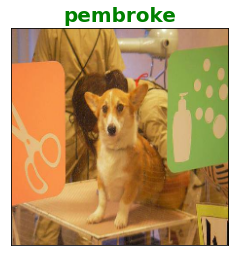

In [63]:
plot_pred(predictions, val_image, val_label, n=89)

Now we've got one function to visualize our models top  prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an inprt of prediction proabilities attay and a ground truth array and an integer 
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels

* plot the top 10 prediction probability values and labels, coloring the true label green

In [64]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_prob = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_predicted_label(pred_prob)

  #Get True label
  true_label = get_predicted_label(true_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][: :-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass


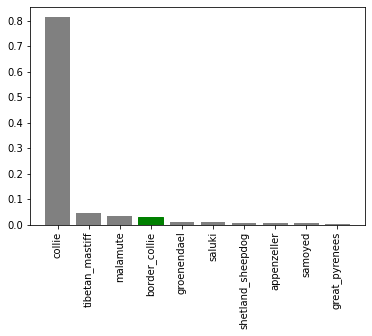

In [65]:
plot_pred_conf(predictions,
               val_label,
               n=9)

Predicted Label is : border_terrier 
 Actual label is : cairn 
 Confidence Percentage: 35.67951321601868%
Predicted Label is : scotch_terrier 
 Actual label is : scotch_terrier 
 Confidence Percentage: 58.80598425865173%
Predicted Label is : basset 
 Actual label is : basset 
 Confidence Percentage: 73.39221239089966%
Predicted Label is : bernese_mountain_dog 
 Actual label is : bluetick 
 Confidence Percentage: 16.517195105552673%
Predicted Label is : airedale 
 Actual label is : airedale 
 Confidence Percentage: 99.0921676158905%
Predicted Label is : bedlington_terrier 
 Actual label is : bedlington_terrier 
 Confidence Percentage: 98.87945652008057%


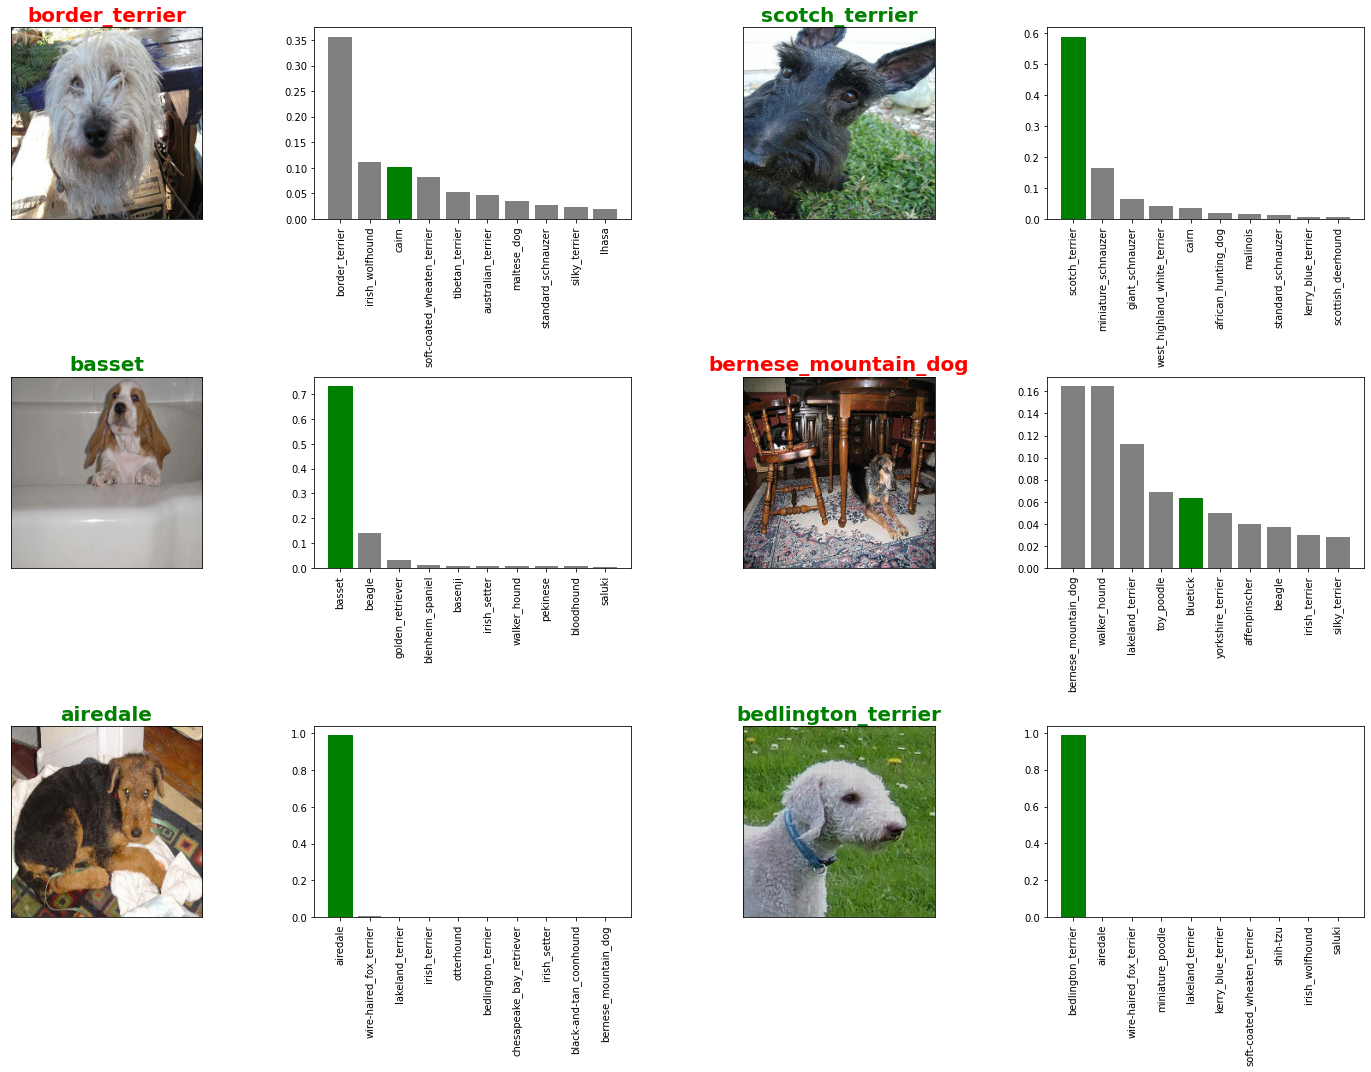

In [66]:
# Let's check a few predictions and their different values
i_index = 0
n_rows = 3
n_cols = 2
num_images = n_rows*n_cols
plt.figure(figsize=(10*n_cols, 5*n_rows))
for i in range(num_images):
  plt.subplot(n_rows, 2*n_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_label,
            image=val_image,
            n=i+i_index)
  plt.subplot(n_rows,2*n_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_label,
                 n=i+i_index)
plt.tight_layout(h_pad=1.0)
plt.show()

## Confusion Matrix:


# Saving and loading Model

In [70]:
# Create a function to save the model
def save_model(model, suffix=None):
  """
  This function save and appens suffix to the model.
  """
  modeldir = os.path.join("drive/My Drive/Dog vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  
  modelpath = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to {modelpath}...")
  model.save(modelpath)
  return modelpath


In [71]:
# Create a function to load the model
def load_model(modelpath):
  """
  Loads the saved model from specified path
  """
  print(f"loading model from {modelpath}...")
  model = tf.keras.models.load_model(modelpath,
                                     custom_objects={'KerasLayer':hub.KerasLayer})
  return model

In [72]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to drive/My Drive/Dog vision/models/20200630-14521593528761-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog vision/models/20200630-14521593528761-1000-images-mobilenetv2-Adam.h5'

In [75]:
# Load a trained model
loaded_1000_images = load_model("drive/My Drive/Dog vision/models/20200630-14521593528761-1000-images-mobilenetv2-Adam.h5")

loading model from drive/My Drive/Dog vision/models/20200630-14521593528761-1000-images-mobilenetv2-Adam.h5...


In [77]:
# Evaluate pre-saved model
model.evaluate(valid_data)

7/7 [==============================] - 1s 148ms/step - loss: 1.2328 - accuracy: 0.6700


[1.232845425605774, 0.6700000166893005]

In [79]:
#Evaluate loaded model
loaded_1000_images.evaluate(valid_data)

7/7 [==============================] - 1s 150ms/step - loss: 1.2328 - accuracy: 0.6700


[1.232845425605774, 0.6700000166893005]